In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection

## Bagging Classifier 
- learner: Decision Tree

## Random Forest Classifier
- 기본 bagging 시스템 + feature 랜덤샘플링 추가로 just bagging 보다는 약간 성능이 높다고 할 수 있다 

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

#### Load Dataset (2 moons)

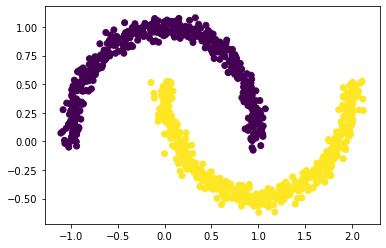

In [39]:
size = 1000
X_moons, y_moons = datasets.make_moons(size, noise=0.05, random_state=42)
X = X_moons[:,0]
Y = X_moons[:,1]
plt.scatter(X, Y, c=y_moons)
plt.show()

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_moons, y_moons, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


#### Classifier 생성 및 학습, 예측
- bag_clf: bagging classifier
- rf_cllf: random forest classifier

In [58]:
# Bagging Classifier 생성
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, 
    bootstrap=True, n_jobs=-1, oob_score=True)

# 학습
bag_clf.fit(X_train, Y_train)

# 예측 
bag_pred = bag_clf.predict(X_test)

In [60]:
print("Bagging Classifier w DT:", accuracy_score(pred, Y_test))

Bagging Classifier w DT: 0.985


In [61]:
# Random Forest Classifier 생성
rf_clf = RandomForestClassifier(n_jobs=2, 
                             random_state=0)
# 학습
rf_clf.fit(X_train, Y_train)
# 예측
rf_pred = rf_clf.predict(X_test)

In [62]:
print("Random Forest classifier:", accuracy_score(rf_pred, Y_test))

Random Forest classifier: 0.99


<br><br>

***
### IRIS 사용 RF
#### Iris 데이터 load 및 train, test split

In [11]:
iris = datasets.load_iris()
X, Y = iris.data[:, 1:3], iris.target

In [12]:
print(list(iris.feature_names))
print(iris.data[0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print(list(iris.target_names))
print(list(np.unique(iris.target)))

['setosa', 'versicolor', 'virginica']
[0, 1, 2]


In [17]:
X_train, X_test, Y_train,Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state = 1)
print('train: %d, test: %d'%(len(X_train), len(X_test)))

train: 105, test: 45


#### Classifier (Bagging의 한 종류인 RF) 생성 및 학습

In [18]:
clf = RandomForestClassifier(n_jobs=2, 
                             random_state=0)

In [19]:
# 학습 데이터 X, Y fitting
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 예측

In [20]:
# test 예측
clf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [21]:
# 예측된 y결과값에 대한 확률 추출 (초반 10개만)
clf.predict_proba(X_test)[0:10]

array([[1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.9 , 0.1 ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.  , 0.9 ],
       [0.  , 0.7 , 0.3 ],
       [0.  , 0.15, 0.85],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ]])

#### 성능 확인

In [27]:
preds = iris.target_names[clf.predict(X_test)]
preds[0:5]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica'],
      dtype='<U10')

In [29]:
# 예측값과 실제(기대값) 비교 테이블 생성
pd.crosstab(Y_test, preds, rownames=['Actual'], colnames=['Prediction'])

Prediction  setosa  versicolor  virginica
Actual                                   
0               14           0          0
1                0          17          1
2                0           0         13

<br>

***

#### Reference
[후니의 컴퓨터](https://hoony-gunputer.tistory.com/144?category=742600)